# <center><u>Bike Sharing Assignment </center>

## <center> Multiple Linear Regression </center>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# Read Data using pandas
data = pd.read_csv('day.csv')

### <center> Knowing the dataset

In [3]:
# Viewing top 5 records
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the info and data describe of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <center> Data Cleaning

<ol><B>
    <li>From Info we could see that there is no null values in any of the columns.
    <li>Also the data type of the values seems to be good.</li>
    <li>From their describe method also we could confirm that there is not any unusual.</li>
</B>
</ol>

#### Dropping the variables

1. `instant` column is more of a serial number type variable which serves no purpose.
2. `casual` and `registered` columns are contributing to the <b>cnt</b> column so we can remove those two columns and retain cnt column. 
          Since, casual + registered = cnt
3. Also the `dteday` column is also meaningless since we have seperate columns already present for year,month and weekday. While date stays not useful.

In [7]:
data.dteday[0]

'01-01-2018'

In [8]:
# We can introduce a new variable as Business_age_in_days which is the age of business from the starting date
# here starting date is considered as '01-01-2018' 

data['business_age_in_days'] = (pd.to_datetime(data.dteday,format='%d-%m-%Y') - pd.to_datetime(data.dteday[0],format = '%d-%m-%Y')).dt.days

In [9]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,business_age_in_days
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
# Dropping the 4 columns, since they stand irrelavent to the dataset.
data_cleaned = data.drop('instant',axis=1)
data_cleaned.drop('casual',axis=1,inplace =True)
data_cleaned.drop('registered',axis=1,inplace =True)
data_cleaned.drop('dteday',axis =1,inplace =True)

In [11]:
data_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,business_age_in_days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


## <center> Exploratory Data Analysis

In [12]:
# Checking for value vounts of weathersit variable 
data_cleaned.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

<b>Assumption of the column weathersit as per the below definition from the readme file

weathersit : 
1. Clear, Few clouds, Partly cloudy, Partly cloudy    =  excellent
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   = good
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    = moderate
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    = severe

In [13]:
# Changing the weathersit data from 1,2,3,4 to actual definition of categorical variable
data_cleaned.weathersit.replace({1:'excellent',2:'good',3:'moderate',4:'severe'},inplace = True)

In [14]:
# Checking for value vounts of weathersit variable 
data_cleaned.weathersit.value_counts()

excellent    463
good         246
moderate      21
Name: weathersit, dtype: int64

<b>Assumption of the column season as per the below definition from the readme file

season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [15]:
# Checking for value vounts of season variable
data_cleaned.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
# Changing the season data from 1,2,3,4 to actual definition of categorical variable
data_cleaned.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)

In [17]:
# Checking for value vounts of season variable
data_cleaned.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

<b>
We could also see that the month variable is categorical and has 12 categories.<br>
Same applies to weekday variable having 7 categories.



In [18]:
# Replacing mnth values to their original Value of definition.
data_cleaned.mnth.replace({1:'january',2: 'february', 3: 'march', 4: 'april',5: 'may', 6: 'june', 7: 'july', 
                           8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'},inplace = True)

In [19]:
# Replacing weekday values to their original Value of definition.
data_cleaned.weekday.replace({1: 'monday',2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday', 0: 'sunday'},inplace = True)

In [20]:
# Backup point
data_eda = data_cleaned

In [21]:
data_eda.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,business_age_in_days
0,spring,0,january,0,monday,1,good,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,january,0,tuesday,1,good,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,january,0,wednesday,1,excellent,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,january,0,thursday,1,excellent,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,january,0,friday,1,excellent,9.305237,11.46350,43.6957,12.522300,1600,4


#### Checking for outliers

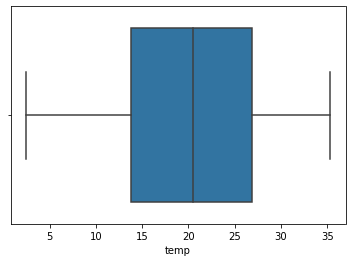

In [22]:
# Checking the outliers for temp
sns.boxplot(data_eda.temp)
plt.show()

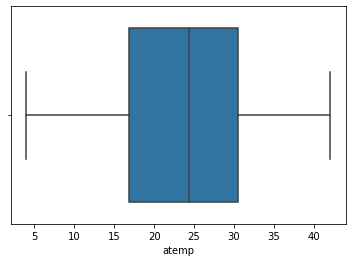

In [23]:
# Checking the outliers for atemp
sns.boxplot(data_eda.atemp)
plt.show()

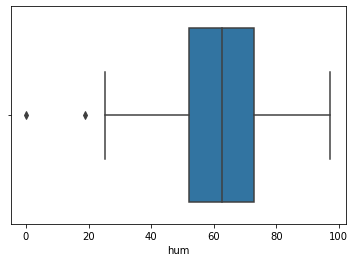

In [24]:
# Checking the outliers for hum
sns.boxplot(data_eda.hum)
plt.show()

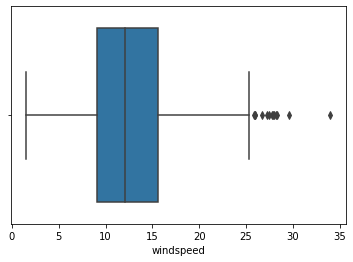

In [25]:
# Checking the outliers for windspeed
sns.boxplot(data_eda.windspeed)
plt.show()

<b> Inference from Box plots</b><br>
From the above 4 box plots we could conclude that there is not much outliers in the continuous variables

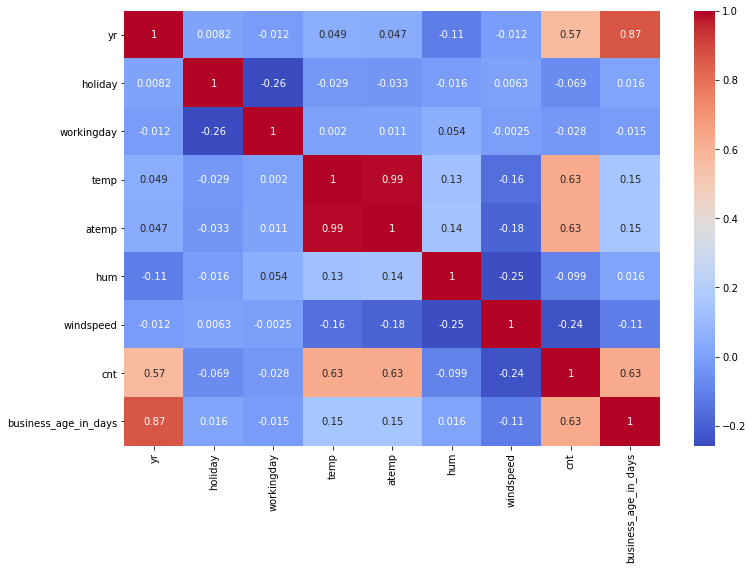

In [26]:
# Checking for Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data_eda.corr(),annot = True,cmap='coolwarm')
plt.show()

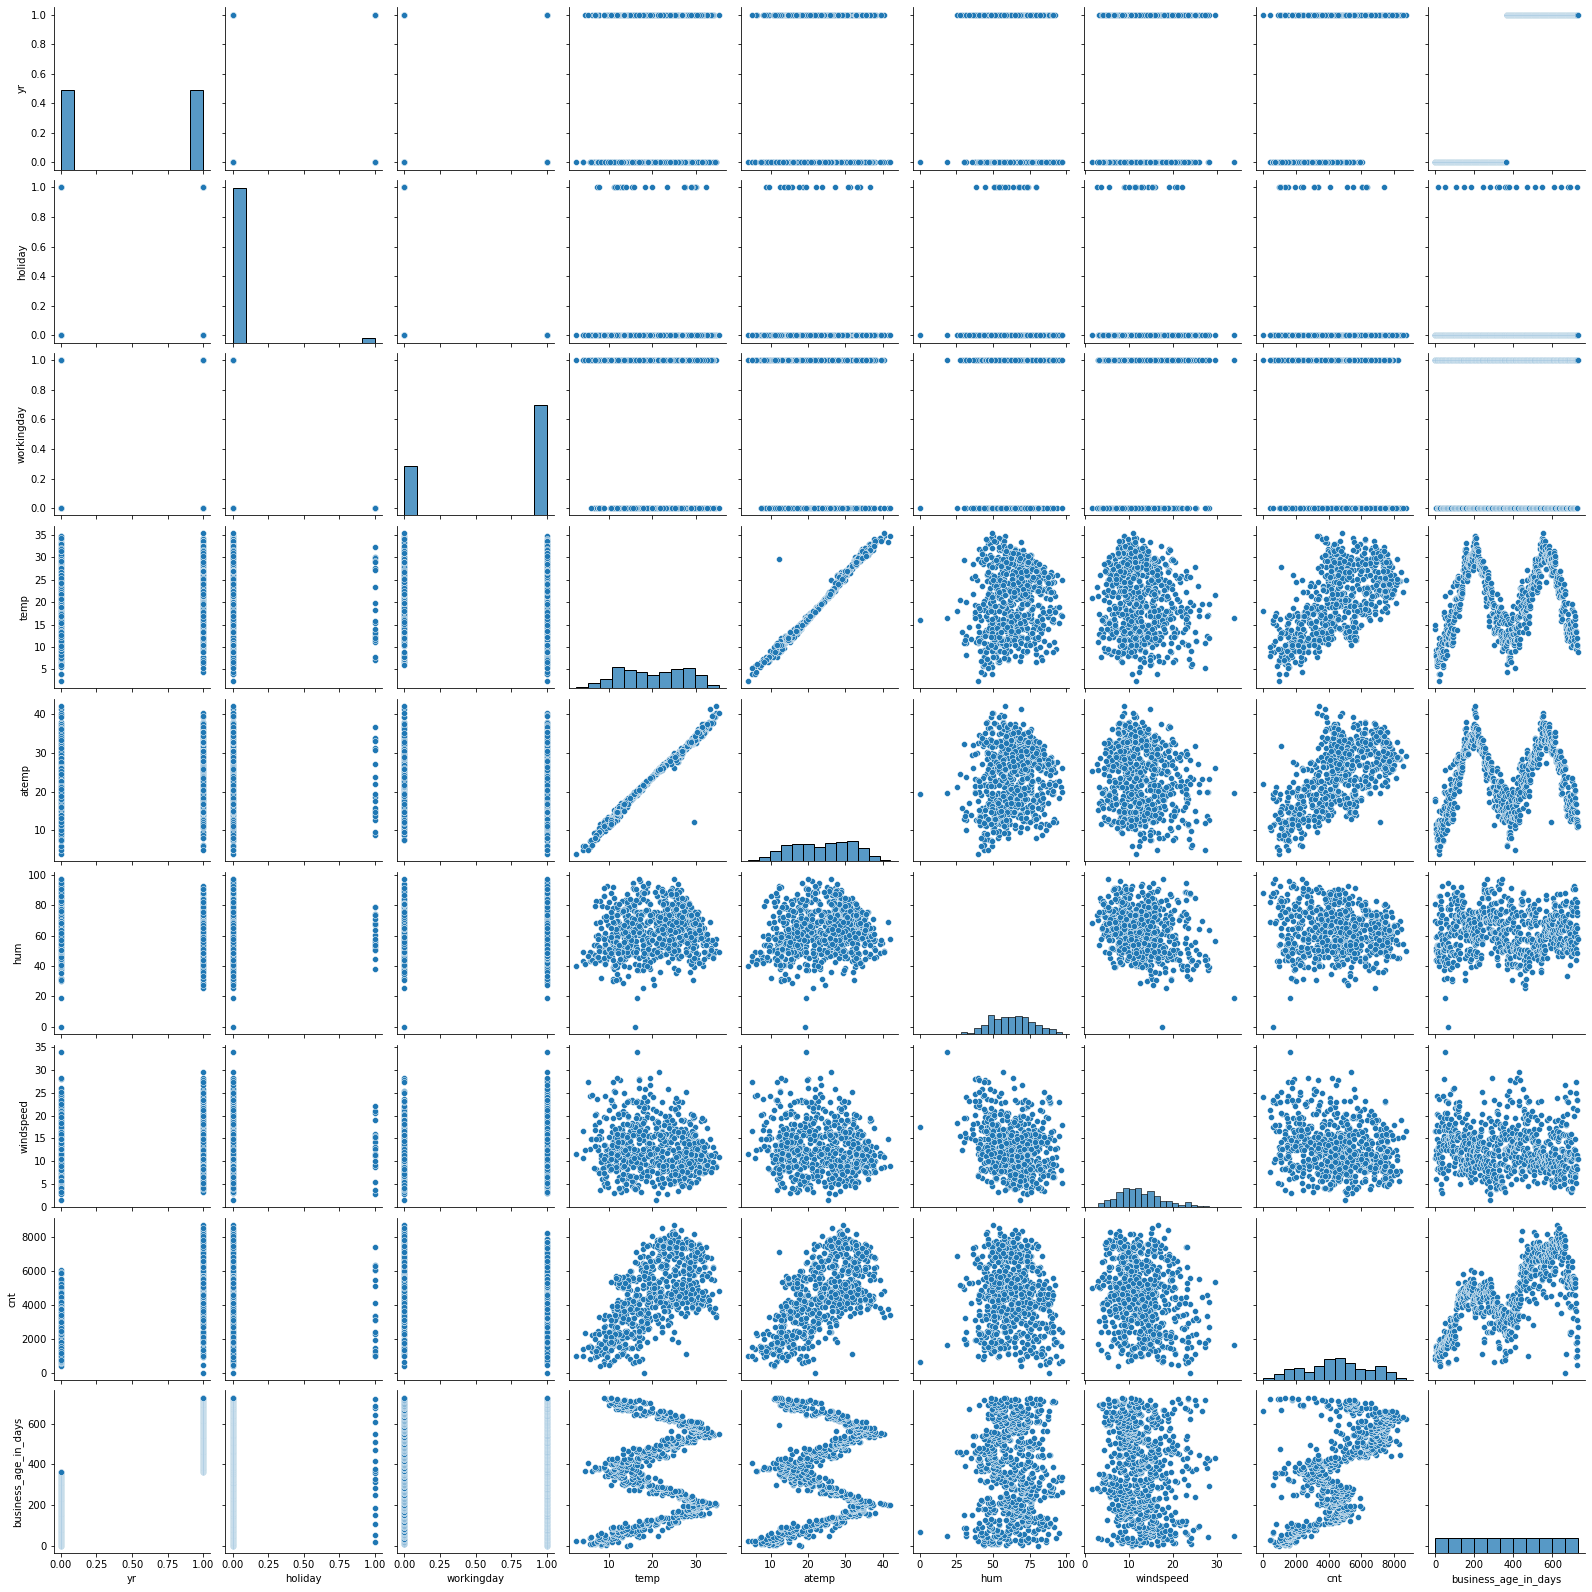

In [27]:
# Checking for pair plot
sns.pairplot(data_eda)
plt.show()

From the above pair plot we could see that meaningful insights can be seen in the following columns

temp,atemp,hum,cnt,windspeed

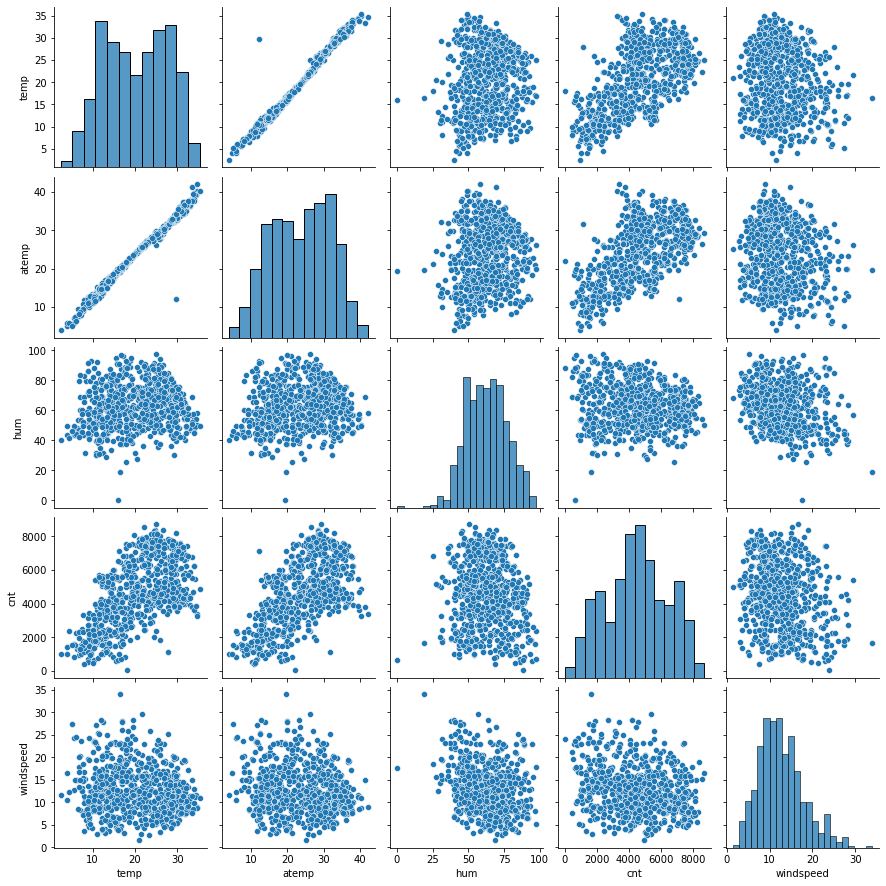

In [28]:
# Checking for pair plot
sns.pairplot(data_eda[['temp','atemp','hum','cnt','windspeed']])
plt.show()

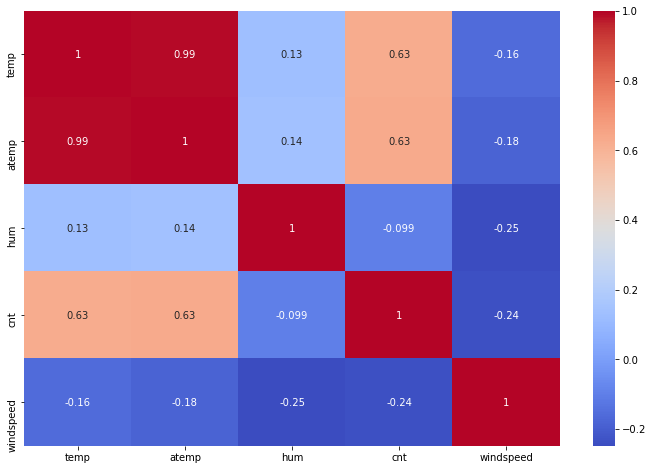

In [29]:
# Checking for Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data_eda[['temp','atemp','hum','cnt','windspeed']].corr(),annot = True,cmap='coolwarm')
plt.show()

#### Univariate Analysis

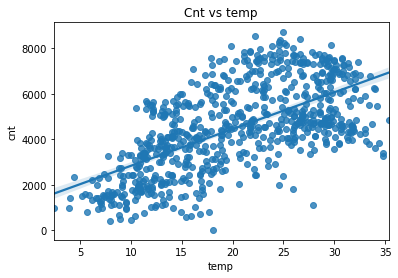

In [30]:
# Cnt vs temp
plt.title("Cnt vs temp")
sns.regplot(data=data_eda,y="cnt",x="temp")
plt.show()

<b>Inference</b><br>
1. Cnt seems to be very slightly scattered but more kind of linearly increasing, as the temp increases, the cnt also increases.
2. Both variables are positive correlated

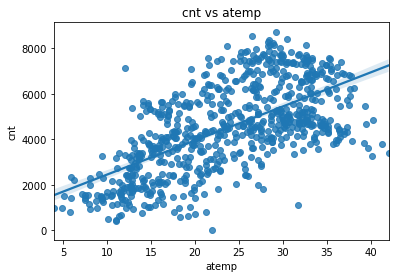

In [31]:
# Cnt vs atemp
plt.title("cnt vs atemp")
sns.regplot(data=data_eda,y='cnt',x='atemp')
plt.show()

<b>Inference</b><br>

1. Cnt seems to be very slightly scattered but more kind of linearly increasing, as the atemp increases, the cnt also increases.
2. Both variables are positive correlated

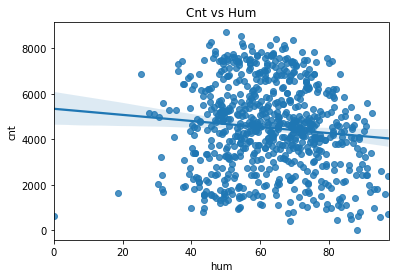

In [32]:
# Cnt vs Hum
plt.title("Cnt vs Hum")
sns.regplot(data=data_eda,x='hum',y='cnt')
plt.show()

<b>Inference</b><br>

1. The relationalship seems to be scattered.
2. But from the regression line we could see count decreasing as humidity increases.

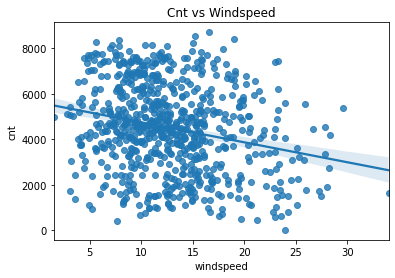

In [33]:
# Cnt vs Windspeed
plt.title("Cnt vs Windspeed")
sns.regplot(data=data_eda,x='windspeed',y='cnt')
plt.show()

<b>Inference</b><br>

1. The relationalship seems to be scattered.
2. But from the regression line we could see count decreasing as windspeed increases.

#### Analysing Categorical Variables vs cnt

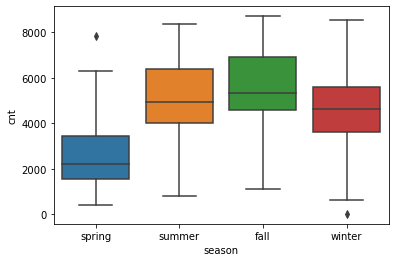

In [34]:
# Season vs cnt
sns.boxplot(x=data_eda['season'],y=data_eda['cnt'])
plt.show()

#### Inference: 
Fall has highest count among the seasons

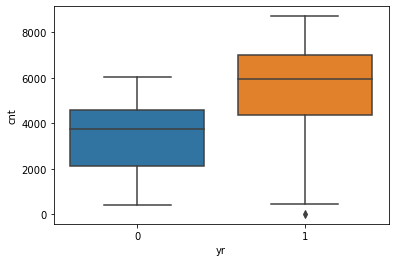

In [35]:
# yr vs cnt
sns.boxplot(x=data_eda['yr'],y=data_eda['cnt'])
plt.show()

#### Inference
Demand for 2nd year has grown

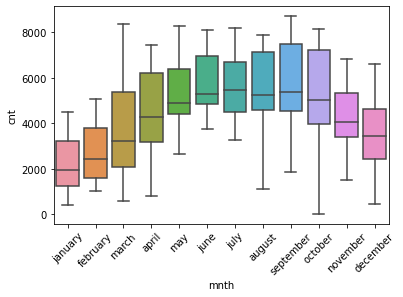

In [36]:
# mnth vs cnt
plt.xticks(rotation=45)
sns.boxplot(x=data_eda['mnth'],y=data_eda['cnt'])
plt.show()

#### Inference
Demand is high for mid year and less on year start and year ends

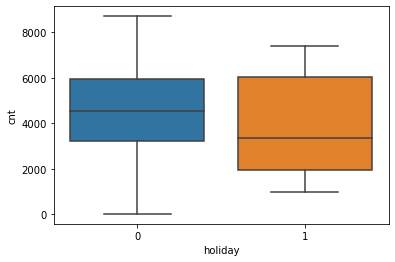

In [37]:
# holiday vs cnt
sns.boxplot(x=data_eda['holiday'],y=data_eda['cnt'])
plt.show()

#### Inference
Mean seems to be less for the holiday days than the no holiday days

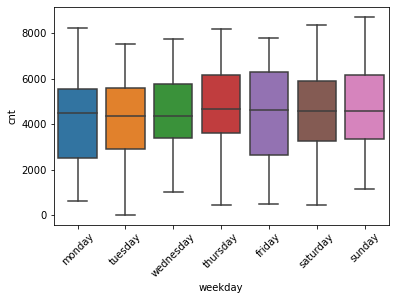

In [38]:
# weekday vs cnt
plt.xticks(rotation=45)
sns.boxplot(x=data_eda['weekday'],y=data_eda['cnt'])
plt.show()

#### Inference
Seems to be the demand is almost same on all days

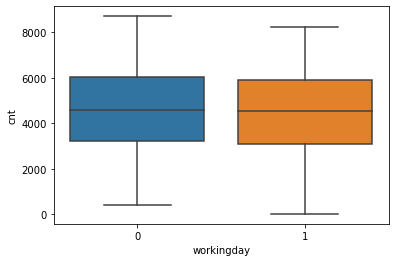

In [39]:
# workingday vs cnt
sns.boxplot(x=data_eda['workingday'],y=data_eda['cnt'])
plt.show()

#### Inference
Both Working and non working day have a similar demand

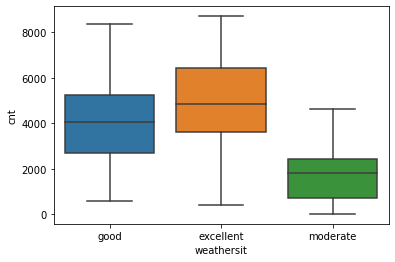

In [40]:
# weathersit vs cnt
sns.boxplot(x=data_eda['weathersit'],y=data_eda['cnt'])
plt.show()

#### inference
During Excellent Climate conditions the count seems to be pretty high

### Multivariate Analysis

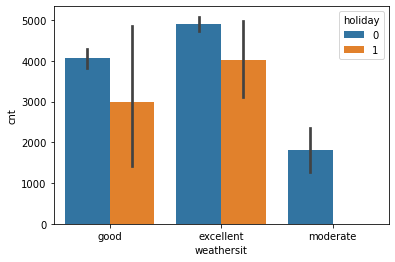

In [41]:
# Weathersit vs cnt vs Holiday plot

sns.barplot(x=data_eda['weathersit'],y=data_eda['cnt'],hue=data_eda['holiday'])
plt.show()

#### Inference

The Non holidays having excellent weather conditions have highest count or demand

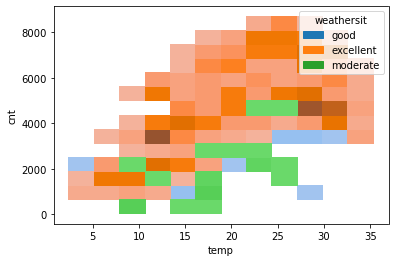

In [42]:
# temp vs cnt vs weathersit
sns.histplot(x=data_eda['temp'],y=data_eda['cnt'],hue=data_eda['weathersit'])
plt.show()

#### Inference
Temperatures above 15 having excellent weather have much demand than other conditions

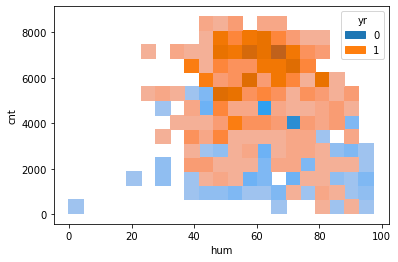

In [43]:
# temp vs cnt vs weathersit
sns.histplot(x=data_eda['hum'],y=data_eda['cnt'],hue=data_eda['yr'])
plt.show()

#### Inference
2019 year with humidity range between 40 to 80 have greater demand

### <center>Data Preparation for Linear Regression </center>

In [44]:
# Creating Dummy Variables for categorical variables
data_dp = pd.get_dummies(data=data_eda,columns=['season','mnth','weekday'],drop_first=True)
data_dp = pd.get_dummies(data=data_dp,columns=['weathersit'])

weathersit first column need not be dropped because there are 4 type of weather 
but data given contains only 3 types of data. So in order to predit wrongly we avoid dropping first column for weathersit column alone

In [45]:
data_dp.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,business_age_in_days,season_spring,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_excellent,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


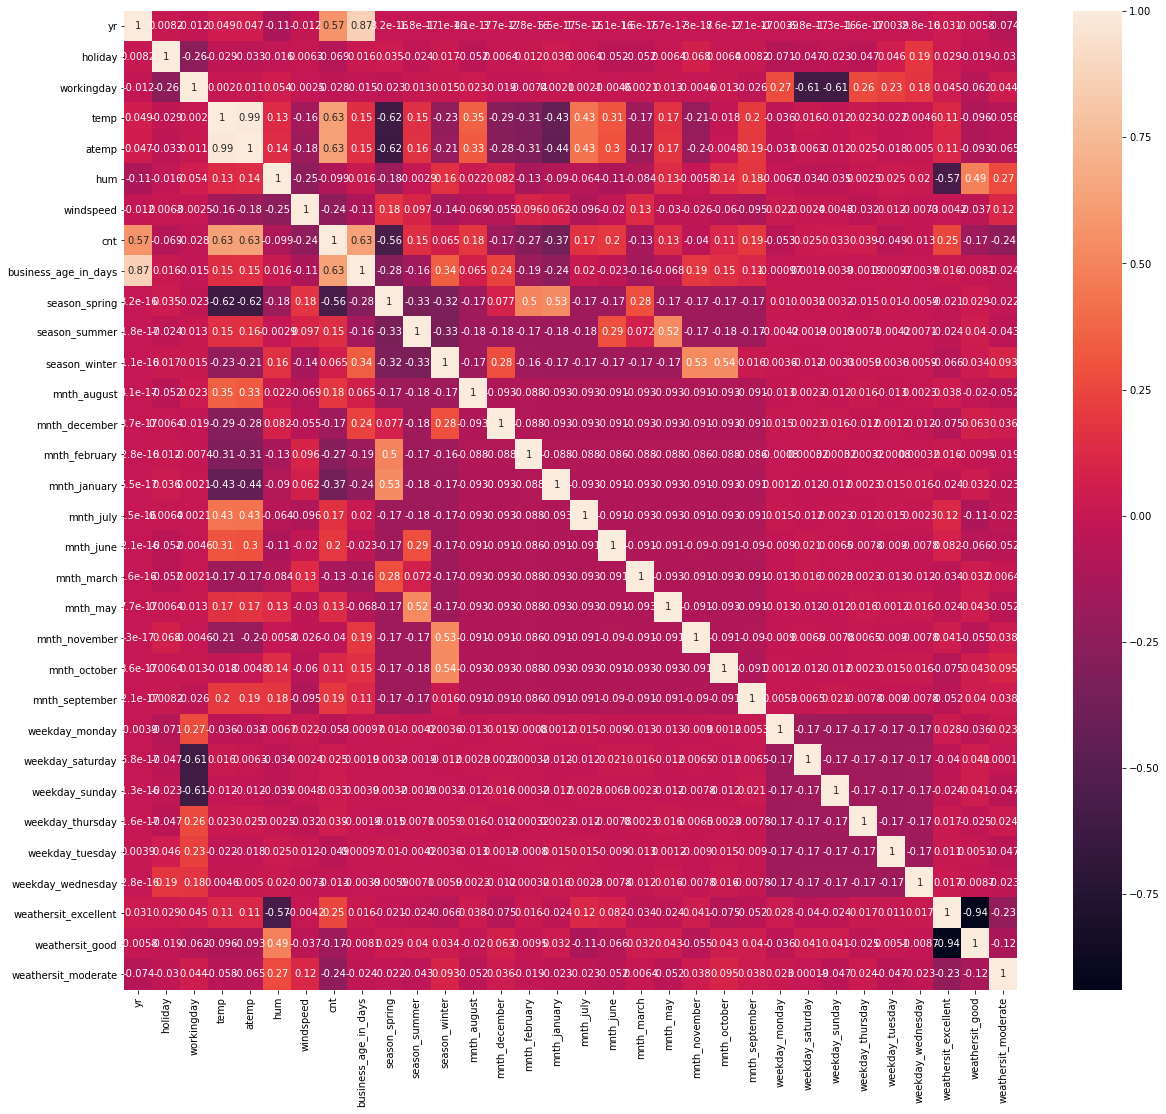

In [46]:
# Check for correlation
plt.figure(figsize=(20,18))
sns.heatmap(data_dp.corr(),annot=True)
plt.show()

In [47]:
data_dp.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_age_in_days', 'season_spring', 'season_summer',
       'season_winter', 'mnth_august', 'mnth_december', 'mnth_february',
       'mnth_january', 'mnth_july', 'mnth_june', 'mnth_march', 'mnth_may',
       'mnth_november', 'mnth_october', 'mnth_september', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_excellent',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [48]:
# X and y split
y=data_dp['cnt']
X=data_dp.drop('cnt',axis=1)

print(y.head())
X.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age_in_days,season_spring,season_summer,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_excellent,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [50]:
X_train.shape

(511, 31)

In [51]:
y_train.shape

(511,)

In [52]:
X_test.shape

(219, 31)

In [53]:
y_test.shape

(219,)

### <center> Feature Scaling

In [54]:
# Normalizing continuous variables
# Minmax scaler

cont_cols = ['temp','atemp','hum','windspeed','business_age_in_days']
scaler = MinMaxScaler()
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_train_norm = X_train

In [55]:
X_train_norm.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age_in_days,season_spring,season_summer,...,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_excellent,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.510763,0.027397,0.686888,0.542737,0.518861,0.560023,0.342299,0.503086,0.254403,0.252446,...,0.082192,0.148728,0.154599,0.135029,0.146771,0.146771,0.133072,0.643836,0.326810,0.029354
std,0.500374,0.163398,0.464214,0.229057,0.214253,0.180277,0.162782,0.288613,0.435952,0.434842,...,0.274926,0.356169,0.361876,0.342090,0.354224,0.354224,0.339986,0.479334,0.469507,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344266,0.339953,0.425718,0.225010,0.251719,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.516900,0.563898,0.317960,0.510316,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742483,0.695083,0.690894,0.434622,0.747593,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <center> Building RFE

In [56]:
# Linear Regression model
lr=LinearRegression()
lr.fit(X_train_norm,y_train)

LinearRegression()

In [57]:
#considering n_features to be as 20 
rfe = RFE(lr,15)
rfe.fit(X_train_norm,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
#Columns selected by RFE and their weights
list(zip(X_train_norm.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('business_age_in_days', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_august', False, 3),
 ('mnth_december', False, 4),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', False, 13),
 ('mnth_june', False, 10),
 ('mnth_march', False, 17),
 ('mnth_may', False, 2),
 ('mnth_november', False, 5),
 ('mnth_october', True, 1),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 14),
 ('weekday_saturday', False, 8),
 ('weekday_sunday', False, 9),
 ('weekday_thursday', False, 16),
 ('weekday_tuesday', False, 11),
 ('weekday_wednesday', False, 15),
 ('weathersit_excellent', True, 1),
 ('weathersit_good', False, 6),
 ('weathersit_moderate', True, 1)]

#### Building a VIF

In [59]:
# Creating a function for ease

def get_vif(cols):
    df_X = X_train_norm[cols]
    vif = pd.DataFrame()
    vif['Features'] = df_X.columns
    vif['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [60]:
X_train_norm.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'business_age_in_days', 'season_spring', 'season_winter',
       'mnth_february', 'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate'],
      dtype='object')

In [61]:
# Considering 20 columns from RFE result
X_train_rfe = X_train_norm[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'business_age_in_days', 'season_spring', 'season_winter',
       'mnth_february', 'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate']]

In [62]:
X_train_rfe.shape

(511, 15)

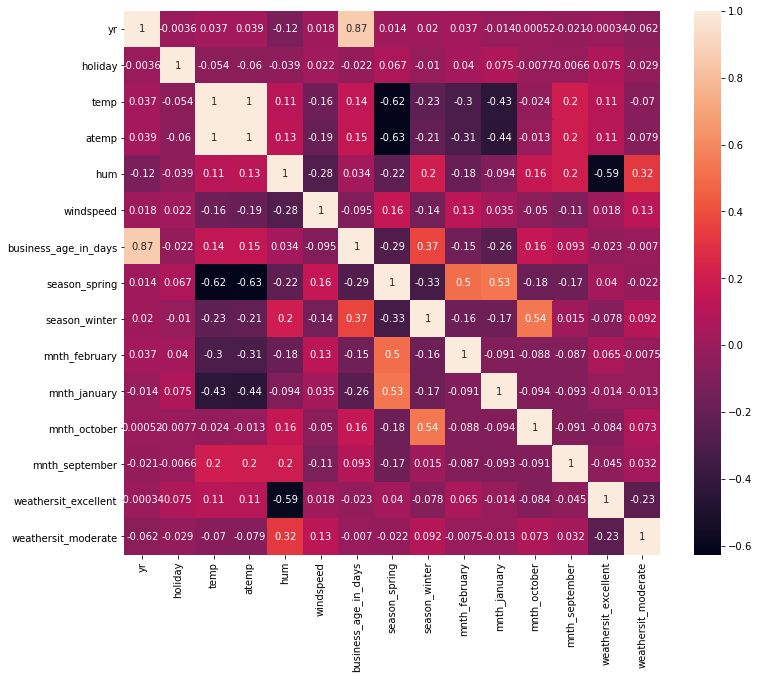

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train_rfe.corr(),annot=True)
plt.show()

### <center> Model Building

In [64]:
# Defining a function to build model

def model_fit(cols):
    X_train_sm = sm.add_constant(X_train_norm[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

#### Model 1

In [65]:
cols = list(X_train_rfe.columns)

In [66]:
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          3.99e-181
Time:                        15:03:33   Log-Likelihood:                -4136.5
No. Observations:                 511   AIC:                             8305.
Df Residuals:                     495   BIC:                             8373.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3194.5307 

In [67]:
get_vif(cols)

                Features      VIF
3                  atemp  1295.52
2                   temp  1255.91
6   business_age_in_days    63.22
0                     yr    26.61
4                    hum    15.57
8          season_winter     5.91
5              windspeed     4.97
7          season_spring     4.38
13  weathersit_excellent     4.27
10          mnth_january     2.51
9          mnth_february     2.16
11          mnth_october     1.67
12        mnth_september     1.26
14   weathersit_moderate     1.22
1                holiday     1.05


#### Model 2

In [68]:
# Droping the variable temp since it as high VIF and high p value as well
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed',
       'business_age_in_days', 'season_spring', 'season_winter',
       'mnth_february', 'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate']

In [69]:
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          3.25e-182
Time:                        15:03:33   Log-Likelihood:                -4136.6
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     496   BIC:                             8367.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3184.3606 

In [70]:
get_vif(cols)

                Features    VIF
5   business_age_in_days  61.47
0                     yr  25.84
2                  atemp  16.75
3                    hum  14.44
7          season_winter   5.61
4              windspeed   4.57
6          season_spring   4.37
12  weathersit_excellent   4.14
9           mnth_january   2.49
8          mnth_february   2.16
10          mnth_october   1.67
11        mnth_september   1.23
13   weathersit_moderate   1.20
1                holiday   1.04


#### Model 3

In [71]:
# Dropping Buisness_age in days as it has high VIF as well as negative coeff
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_february', 'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate']

In [72]:
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          5.71e-179
Time:                        15:03:33   Log-Likelihood:                -4147.0
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     497   BIC:                             8381.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2817.3193 

In [73]:
get_vif(cols)

                Features    VIF
2                  atemp  15.18
3                    hum  13.23
4              windspeed   4.54
5          season_spring   4.29
11  weathersit_excellent   4.00
6          season_winter   2.84
0                     yr   2.09
8           mnth_january   2.07
7          mnth_february   1.91
9           mnth_october   1.61
12   weathersit_moderate   1.20
10        mnth_september   1.19
1                holiday   1.04


#### Model 4

In [74]:
# Dropping season_winter since it has high p value
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'mnth_february', 'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          9.76e-180
Time:                        15:03:33   Log-Likelihood:                -4147.9
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     498   BIC:                             8377.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2979.9557 

In [75]:
get_vif(cols)

                Features    VIF
2                  atemp  10.87
3                    hum   8.96
4              windspeed   4.52
5          season_spring   3.73
10  weathersit_excellent   3.37
7           mnth_january   2.05
0                     yr   2.02
6          mnth_february   1.91
8           mnth_october   1.20
11   weathersit_moderate   1.20
9         mnth_september   1.19
1                holiday   1.04


#### Model 5

In [76]:
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent', 'weathersit_moderate']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          3.02e-180
Time:                        15:03:34   Log-Likelihood:                -4149.5
No. Observations:                 511   AIC:                             8323.
Df Residuals:                     499   BIC:                             8374.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2940.9922 

In [77]:
get_vif(cols)

                Features    VIF
2                  atemp  10.84
3                    hum   8.96
4              windspeed   4.51
9   weathersit_excellent   3.36
5          season_spring   2.47
0                     yr   2.01
6           mnth_january   1.57
7           mnth_october   1.20
10   weathersit_moderate   1.20
8         mnth_september   1.19
1                holiday   1.04


#### Model 6

In [78]:
# Dropping variable weathersit_moderatesince it has negative coeff

cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          2.29e-171
Time:                        15:03:34   Log-Likelihood:                -4173.3
No. Observations:                 511   AIC:                             8369.
Df Residuals:                     500   BIC:                             8415.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3283.7526 

In [79]:
get_vif(cols)

               Features    VIF
2                 atemp  10.50
3                   hum   8.36
4             windspeed   4.40
9  weathersit_excellent   3.32
5         season_spring   2.46
0                    yr   2.01
6          mnth_january   1.57
7          mnth_october   1.20
8        mnth_september   1.19
1               holiday   1.04


#### Model 7

In [80]:
# Atemp variable shows a high VIF and hencce removing it
cols = ['yr', 'holiday', 'hum', 'windspeed', 'season_spring',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          8.59e-135
Time:                        15:03:34   Log-Likelihood:                -4262.4
No. Observations:                 511   AIC:                             8545.
Df Residuals:                     501   BIC:                             8587.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5062.1292 

In [81]:
get_vif(cols)

               Features   VIF
3             windspeed  4.27
2                   hum  3.89
8  weathersit_excellent  2.27
4         season_spring  2.01
0                    yr  1.93
5          mnth_january  1.54
7        mnth_september  1.19
6          mnth_october  1.17
1               holiday  1.04


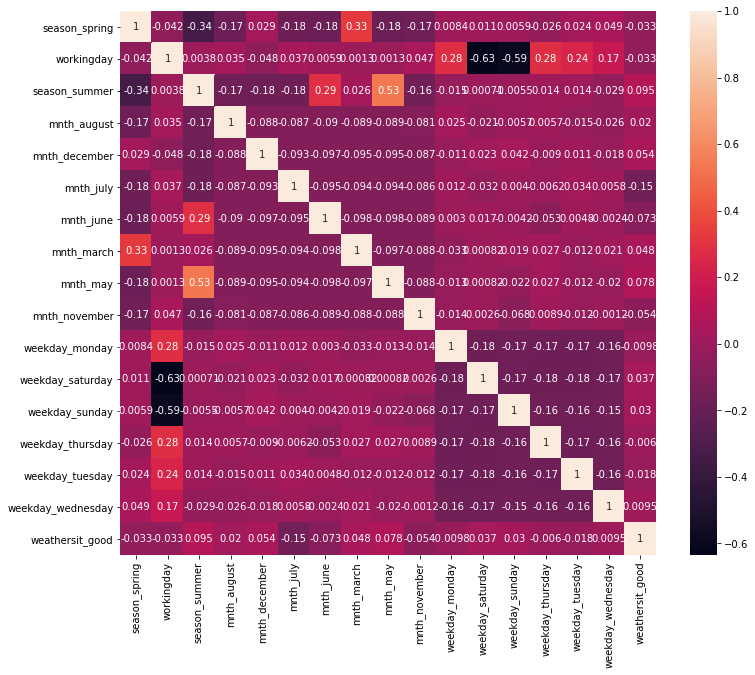

In [82]:
# Checking for the correlation of season_spring vs other non rfe selected columns

plt.figure(figsize=(12,10))
sns.heatmap(X_train_norm[['season_spring','workingday', 'season_summer', 'mnth_august', 'mnth_december',
       'mnth_july', 'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'weathersit_good']].corr(),annot=True)
plt.show()

In [83]:
# we could see the maximum correlation is with mnth_march
# Trying to add Month_march for the new model and removing season_spring

#### Model 8

In [84]:
cols = ['yr', 'holiday', 'hum', 'windspeed', 'mnth_march',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     82.50
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.62e-93
Time:                        15:03:37   Log-Likelihood:                -4361.1
No. Observations:                 511   AIC:                             8742.
Df Residuals:                     501   BIC:                             8785.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4476.1916 

In [85]:
get_vif(cols)

               Features   VIF
3             windspeed  4.13
2                   hum  3.91
8  weathersit_excellent  2.26
0                    yr  1.93
7        mnth_september  1.18
6          mnth_october  1.16
4            mnth_march  1.14
5          mnth_january  1.13
1               holiday  1.04


#### Model 9

In [86]:
# Trying to replace Hum by atemp - just to check if R-squared increases
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'mnth_march',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          6.78e-150
Time:                        15:03:37   Log-Likelihood:                -4226.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     501   BIC:                             8516.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1140.9835 

In [87]:
get_vif(cols)

               Features   VIF
2                 atemp  4.48
3             windspeed  3.68
8  weathersit_excellent  2.76
0                    yr  1.98
5          mnth_january  1.19
7        mnth_september  1.16
4            mnth_march  1.14
6          mnth_october  1.10
1               holiday  1.04


#### Model 10

In [88]:
# Removing Windspeed since it has negative coeff as well as little high VIF
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'mnth_march',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          6.78e-150
Time:                        15:03:37   Log-Likelihood:                -4226.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     501   BIC:                             8516.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1140.9835 

In [89]:
get_vif(cols)

               Features   VIF
2                 atemp  4.48
3             windspeed  3.68
8  weathersit_excellent  2.76
0                    yr  1.98
5          mnth_january  1.19
7        mnth_september  1.16
4            mnth_march  1.14
6          mnth_october  1.10
1               holiday  1.04


#### Model 11

In [90]:
# This increased Mnth_march so retaining the original spring variable
# Remove Windspeed variable due to neg coeff
cols = ['yr', 'holiday', 'atemp', 'season_spring',
         'mnth_january', 'mnth_october', 'mnth_september',
       'weathersit_excellent']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          7.35e-159
Time:                        15:03:37   Log-Likelihood:                -4208.4
No. Observations:                 511   AIC:                             8435.
Df Residuals:                     502   BIC:                             8473.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1286.2618 

In [91]:
get_vif(cols)

               Features   VIF
2                 atemp  3.47
7  weathersit_excellent  2.83
0                    yr  1.98
3         season_spring  1.87
4          mnth_january  1.54
6        mnth_september  1.16
5          mnth_october  1.10
1               holiday  1.04


#### Model 12

In [92]:
# Removing Jan since it has good correlation with spring, instead trying to add season_winter
cols = ['yr', 'season_spring','holiday',  'season_winter',
          'mnth_september', 'mnth_october',
       'weathersit_excellent','atemp']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          4.52e-159
Time:                        15:03:37   Log-Likelihood:                -4207.9
No. Observations:                 511   AIC:                             8434.
Df Residuals:                     502   BIC:                             8472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1013.4924 

In [93]:
get_vif(cols)

               Features   VIF
7                 atemp  3.47
6  weathersit_excellent  2.93
0                    yr  2.05
3         season_winter  1.84
5          mnth_october  1.60
1         season_spring  1.39
4        mnth_september  1.17
2               holiday  1.04


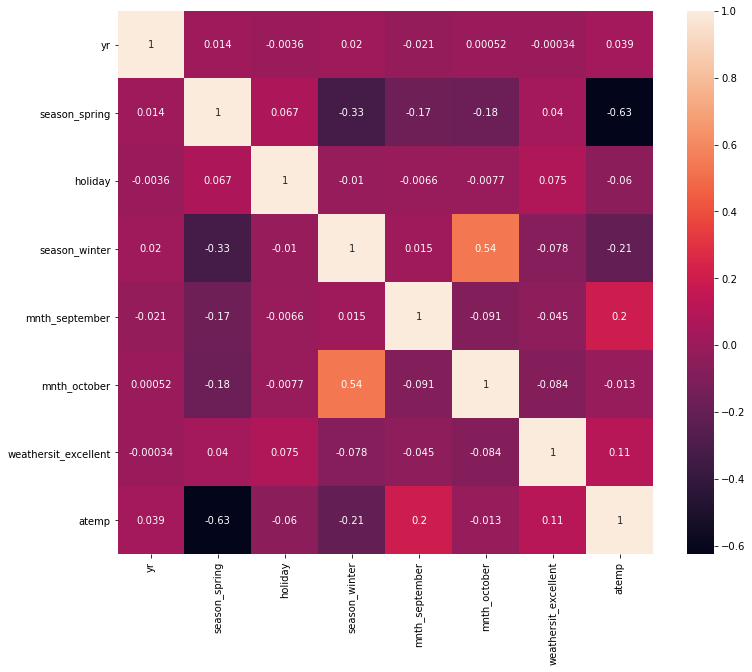

In [94]:
# Checking the correlation of the columns
plt.figure(figsize=(12,10))
sns.heatmap(X_train_norm[['yr', 'season_spring','holiday',  'season_winter',
          'mnth_september', 'mnth_october',
       'weathersit_excellent','atemp']].corr(),annot=True)
plt.show()

#### Model 13

In [95]:
# Removing october month since it has good correlation with season_winter
# Adding Weathersit_moderate
cols=['yr', 'season_spring','holiday',  'season_winter',
          'mnth_september','weathersit_moderate',
       'weathersit_excellent','atemp']
model_fit(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          7.65e-174
Time:                        15:03:38   Log-Likelihood:                -4173.2
No. Observations:                 511   AIC:                             8364.
Df Residuals:                     502   BIC:                             8402.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1168.2468 

In [96]:
get_vif(cols)

               Features   VIF
7                 atemp  3.49
6  weathersit_excellent  3.02
0                    yr  2.05
1         season_spring  1.41
3         season_winter  1.30
4        mnth_september  1.15
5   weathersit_moderate  1.08
2               holiday  1.04


#### Inference<br>
Here VIF seems to be almost accepted. p-value for all the features is 0.0 and R2 is 0.807 Let us select Model 13 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

#### Equation from the resulting model 13
2058.6291(yr) - 1012.2281(season_spring) - 952.6141(holiday) + 473.5620(season_winter) + 572.6302(mnth_september) - 2076.1582(weathersit_moderate) + 630.7923(weathersit_excellent) + 3968.8004(atemp) + 1168.2468

From the above equation we can state than for each unit of year increase and others are constant the demand increases by 2058 times of year approximately.
Likewise when the atemp increases the demand increases by 3968 units while the other variables are kept constant.

In this way the relationship for each and every variable cab be defined or assumed.

#### Model using SK Learn

In [97]:
# Final model using sklearn
cols=['yr', 'season_spring','holiday',  'season_winter',
          'mnth_september','weathersit_moderate',
       'weathersit_excellent','atemp']
lr = LinearRegression()
lr.fit(X_train_norm[cols],y_train)
# Checking for intercept
lr.intercept_

1168.2468091491492

In [98]:
# Checking for coef
lr.coef_

array([ 2058.62913465, -1012.22812323,  -952.61406638,   473.56197673,
         572.63017024, -2076.15819085,   630.79232581,  3968.80040669])

### <center> Model Evaluation

In [99]:
# Getting the predictions for training data
y_train_pred = lr.predict(X_train_norm[cols])

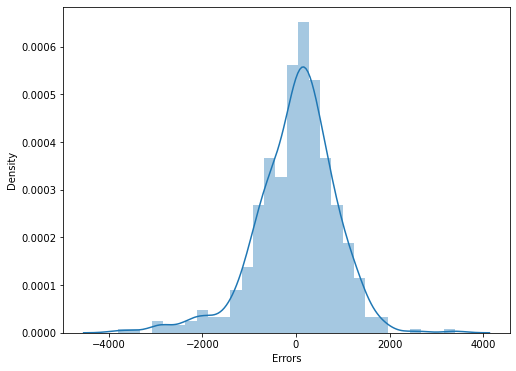

In [100]:
# Plotting the error
plt.figure(figsize=(8,6))
sns.distplot(y_train-y_train_pred)
plt.xlabel('Errors')
plt.show()

#### Error in normally distributed here and mean is 0

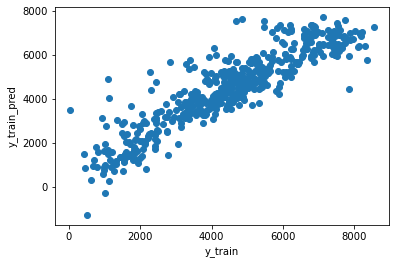

In [101]:
# To check the scatter plot of spread of the y_train vs Predictions
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

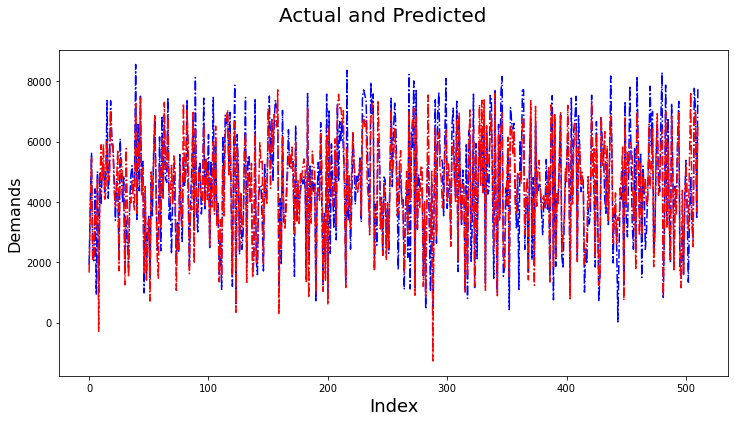

In [102]:
#Actual vs Predicted
c = [i for i in range(0,len(X_train_norm),1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-.")
plt.plot(c,y_train_pred, color="red",  linewidth=1.5, linestyle="-.")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Demands', fontsize=16)                               
plt.show()

#### Actual and predicted seems to be nearly same pattern since the model are performing well on train dataset.

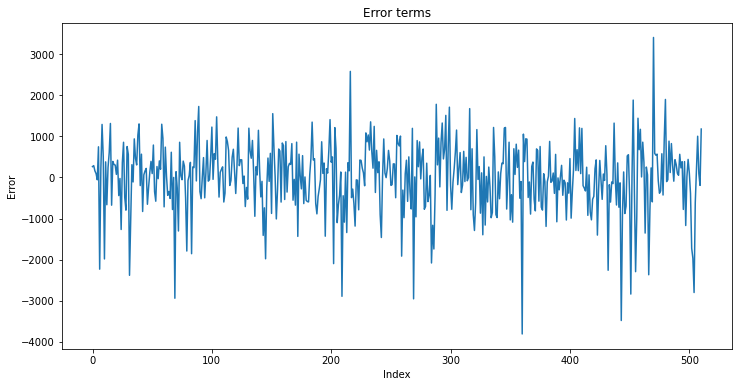

In [103]:
# Error Terms
c = [i for i in range(0,len(X_train_norm),1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_train-y_train_pred)
plt.title('Error terms')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()

In [104]:
# Print r2 score
r2_score(y_train,y_train_pred)

0.8069007168150243

#### Inference <br> <br> This is same as we obtained for our final Model 13.

#### Predict the values for test data

In [105]:
# Transforming the data to minmax scaler
cont_cols_test = ['temp','atemp','hum','windspeed','business_age_in_days']
X_test[cont_cols_test] = scaler.transform(X_test[cont_cols_test])

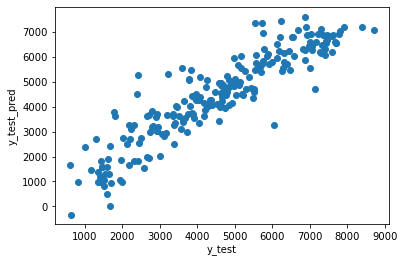

In [106]:
cols_test=['yr', 'season_spring','holiday',  'season_winter',
          'mnth_september','weathersit_moderate',
       'weathersit_excellent','atemp']
y_test_pred = lr.predict(X_test[cols_test])

# Plot the y_test vs y_test_pred
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [107]:
# Checking the rsquared value

r2_score(y_test,y_test_pred)

0.8309362235824685

#### Inference
We can see that the r2 score of train and test set are nearly same.<br>
Also from the plot we could see the error terms does not vary much.

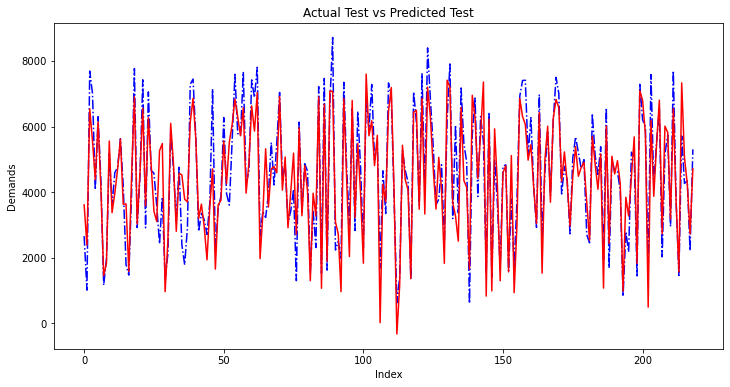

In [108]:
# Actual test vs Predicted Test
c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(12,6))
plt.plot(c,y_test,color='blue',linewidth=1.5,linestyle='-.')
plt.plot(c,y_test_pred,color='red',linewidth=1.5,linestyle='-')
plt.title("Actual Test vs Predicted Test")
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

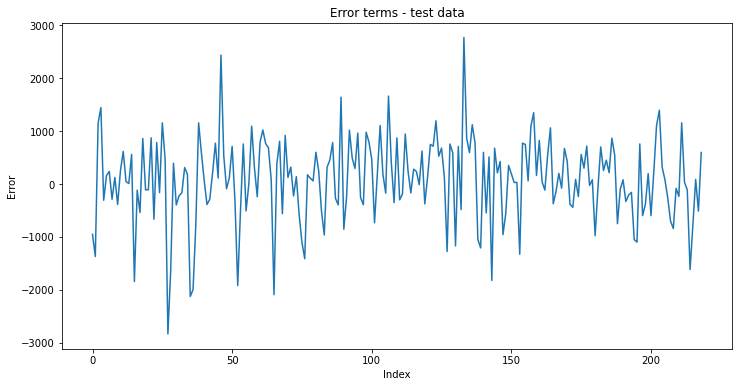

In [109]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_test-y_test_pred)
plt.title('Error terms - test data')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()

In [110]:
# Getting the columns from the Linear Regression model
df = pd.DataFrame(cols,columns={'Columns'})

In [111]:
df['Coef'] = lr.coef_

In [112]:
df

,Columns,Coef
0,yr,2058.629135
1,season_spring,-1012.228123
2,holiday,-952.614066
3,season_winter,473.561977
4,mnth_september,572.630170
5,weathersit_moderate,-2076.158191
6,weathersit_excellent,630.792326
7,atemp,3968.800407


## <center> <u>Results

1. Comnpany should focus on the season spring since it has great effect of decreasing demand when taken over all year count. <br>
2. Company can provide offers and discounts on holiday to boost up the demand. <br>
3. From what we see there is regular demand only on working days and weekdays, so by bringing some exclusive packages we can take advantage of people during the weekends also. <br>
4. When the weather is moderate also the people use less and hence we can try to do regular service of bikes on that time frame.

<b> Post COVID lockdowns and once the situation comes to normal the above suggesstions can be followed along with few new marketing strategies through newspaper, magazines, internet etc., to have a smooth start. Also clean maintenance of the bikes will make the business run through in a successfull mode.

### Variables standing as the predictor for demand in bike sharing are
<font color="brown">
<em>
<br>
<b>
<ul>
<li> yr - Year
<li> atemp - Feeling temperature in Celsius
<li> holiday
<li> season - 1. spring<br>
     season - 4. Winter
<li> mnth - September month
<li> weathersit - moderate : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    weathersit - excellent : Clear, Few clouds, Partly cloudy, Partly cloudy
</em>
</font>